In [2]:
import pandas as pd
import numpy as np
import os
import random

method_data = pd.read_csv('/home/fmq/MESA/work/my/MCMC/code/lei/iso_grid.csv')

def load_test():
    path_test_star = "/home/fmq/MESA/work/my/MCMC/code/lei//test_star"
    files = sorted(os.listdir(path_test_star))
    # 指定要使用的列
    usecols = ["star_mass", "surface_he4", "star_age", "log_Teff", "log_g", "log_L", "radius", "center_he4"]
    # 用于存储所有数据的列表
    data_list = []
    # 循环处理每个文件
    for i, file in enumerate(files):
        # 构建文件路径
        file_path = os.path.join(path_test_star, file)
        df = pd.read_csv(file_path, skiprows=5, delim_whitespace=True, usecols=usecols)
        df = df.apply(pd.to_numeric, errors='coerce')
        try:
            start_index = np.where(df['center_he4'] < 0.93)[0][0]
        except IndexError:
            # print(f"Error ZAHB: {files[i]}")
            continue
        df = df[start_index:-1]
        df.drop('center_he4', axis=1, inplace=True)
        df['star_age'] = np.log10(df['star_age'])
        df['surface_he4'] = np.log10(df['surface_he4']/4/(1-df['surface_he4']))
        # 在 start_index 和 df 的长度减一之间生成一个随机整数
        random_index = random.randint(0, len(df) - 1)
        data_list.append({
            'star_name': f'star{i}',
            'log_Teff': df["log_Teff"].iloc[random_index],
            'log_Teff_err': 0.013,
            'log_g': df["log_g"].iloc[random_index],
            'log_g_err': 0.1,
            'log_he': df["surface_he4"].iloc[random_index],
            'log_he_err': 0.1,
            'mass_true':df["star_mass"].iloc[random_index],
            'log_L_true':df["log_L"].iloc[random_index],
            'radius_true':df["radius"].iloc[random_index],
            'age_true':df["star_age"].iloc[random_index]
        })
    # 将所有的 DataFrame 连接成一个单一的 DataFrame
    return data_list
observed_data = load_test()
def chi2_sol(observed, predicted, observed_err):
        return ((observed - predicted) / observed_err) ** 2
# method_data = method_data.iloc[(abs(method_data['log_Teff']-4.55)<0.05).tolist()]
# method_data = method_data.iloc[(abs(method_data['log_g']-6.00)<0.1).tolist()]
# method_data = method_data.iloc[(abs(method_data['log_he']-0.907)<0.5).tolist()]
i = 11
observed_log_Teff = observed_data[i]['log_Teff']
observed_log_g = observed_data[i]['log_g']
observed_log_he = observed_data[i]['log_he']
mass_true = observed_data[i]['mass_true']
print(mass_true)


0.5278433960728282


In [15]:

change_indices = np.where(method_data["mass"].iloc[:-1].values != method_data["mass"].iloc[1:].values)[0]
predicted_log_teff = method_data['log_Teff'].values
predicted_log_g = method_data['log_g'].values
predicted_log_he = method_data['log_he'].values
chi2_log_Teff = chi2_sol(observed_log_Teff, predicted_log_teff, 0.013)
chi2_log_g = chi2_sol(observed_log_g, predicted_log_g, 0.25)
chi2_log_he = chi2_sol(observed_log_he, predicted_log_he, 0.1)
chi2_interp = chi2_log_Teff + chi2_log_g + chi2_log_he
chi2_interp_segments = np.split(chi2_interp, change_indices + 1)
method_data_segments = np.split(method_data, change_indices + 1)
min_values = []
for segment in chi2_interp_segments:
        a = min(segment)
        min_values.append(a)
# min_values = [min(segment) for segment in chi2_interp_segments]
mass_values = [segment['mass'].iloc[0] for segment in method_data_segments]
# 计算这些最小值的平均值


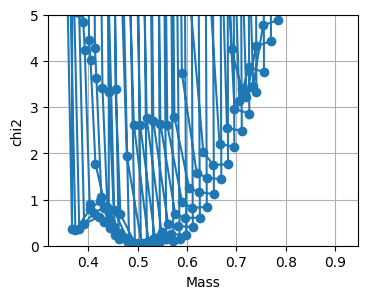

In [16]:
import matplotlib.pyplot as plt
min_log_values = np.log10(min_values)
# log_p = np.exp(-0.5*vaule for vaule in min_values)
plt.figure(figsize=(4, 3))
plt.plot(mass_values, min_values, marker='o')
plt.xlabel('Mass')
plt.ylabel('chi2')
plt.ylim(0, 5)
plt.grid(True)
plt.show()

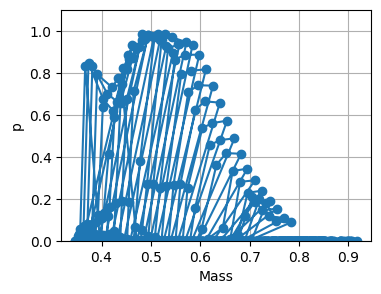

In [21]:
import matplotlib.pyplot as plt
min_log_values = np.log10(min_values)
log_p = np.exp(-0.5*np.array([value for value in min_values]))
plt.figure(figsize=(4, 3))
plt.plot(mass_values, log_p, marker='o')
plt.xlabel('Mass')
plt.ylabel('p')
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

[0.3469429706681287, 0.3473429706681287, 0.3478429706681287, 0.3488429706681287, 0.3518429706681287, 0.3538429706681287, 0.3568429706681288, 0.3668429706681287, 0.3968429706681288, 0.4168429706681288, 0.4468429706681287, 0.3536647747875996, 0.3540647747875996, 0.3545647747875996, 0.3555647747875996, 0.3585647747875996, 0.3605647747875996, 0.3635647747875996, 0.3735647747875997, 0.4035647747875996, 0.4235647747875996, 0.4535647747875996, 0.3615350784853147, 0.3619350784853148, 0.3624350784853148, 0.3634350784853148, 0.3664350784853148, 0.3684350784853148, 0.3714350784853148, 0.3814350784853148, 0.4114350784853148, 0.4314350784853148, 0.4614350784853149, 0.3713486177429129, 0.3717486177429129, 0.3722486177429129, 0.3732486177429129, 0.3762486177429129, 0.3782486177429129, 0.3812486177429128, 0.391248617742913, 0.4212486177429129, 0.4412486177429129, 0.4712486177429129, 0.3826714149726924, 0.3830714149726925, 0.3835714149726925, 0.3845714149726925, 0.3875714149726925, 0.3895714149726926, 

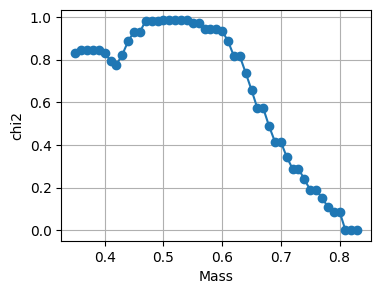

In [24]:
import numpy as np

chi2 = []
mass = np.arange(0.35, 0.84, 0.01)
print(mass_values)
print(min_values)
for massi in mass:
    indices = np.where(np.abs(np.array(mass_values) - massi) <= 0.020)[0]
    # chi2.append(np.mean(np.array(min_values)[indices]))
    chi2.append(min(np.array(min_values)[indices]))
print(len(mass))
print(len(chi2))
log_p = np.exp(-0.5*np.array([value for value in chi2]))
plt.figure(figsize=(4, 3))
plt.plot(mass, log_p, marker='o')
plt.xlabel('Mass')
plt.ylabel('chi2')
# plt.ylim(0, 0.5)
plt.grid(True)
plt.show()

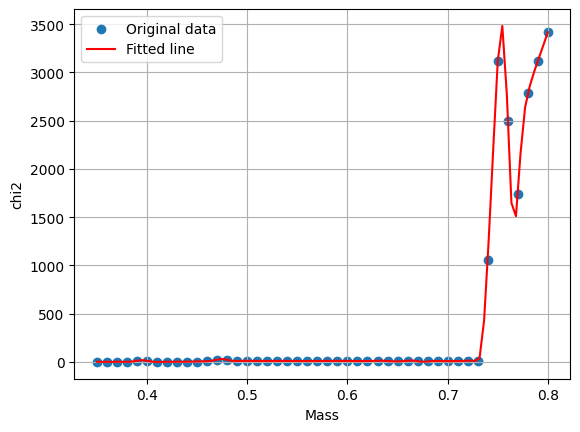

In [197]:
from scipy.interpolate import UnivariateSpline

# 使用三次样条进行拟合
spline = UnivariateSpline(mass, chi2, k=2)

# 画出原始数据
plt.scatter(mass, chi2, label='Original data')

# 画出拟合曲线
mass_line = np.linspace(mass.min(), mass.max(), 100)
chi2_line = spline(mass_line)
plt.plot(mass_line, chi2_line, color='red', label='Fitted line')

plt.xlabel('Mass')
plt.ylabel('chi2')
plt.legend()
plt.grid(True)
plt.show()

[Text(0.5, 0, '$\\log T_{\\rm eff}/K$'), Text(0, 0.5, '$\\log g$')]

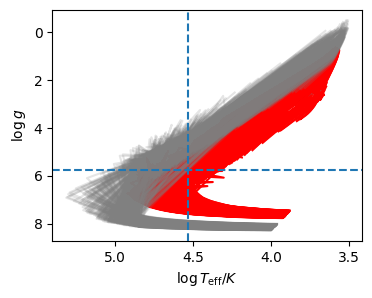

In [35]:
import matplotlib.pyplot as plt
plt.figure(dpi=100, figsize=(4, 3))
ax = plt.gca()

change_indices_all = np.where((method_data["mass"].iloc[:-1].values != method_data["mass"].iloc[1:].values) | (method_data["he"].iloc[:-1].values != method_data["he"].iloc[1:].values))[0]
method_data_siginl = np.split(method_data, change_indices_all + 1)

for data in method_data_siginl:
    if not data.empty:
        star_mass = data['star_mass'].iloc[0]
        if 0.35 < star_mass < 0.45:
            ax.plot(data['log_Teff'], data['log_g'], color='r', alpha=1, label='0.35<M<0.45')
        if 0.60 < star_mass < 0.75:
            ax.plot(data['log_Teff'], data['log_g'], color='gray', alpha=0.2, label='0.60<M<0.75')
# ax.axvline(x=observed_log_Teff, linestyle='--')
# ax.axhline(y=observed_log_g, linestyle='--')
ax.axvline(x=4.533, linestyle='--')
ax.axhline(y=5.772, linestyle='--')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')

[Text(0.5, 0, '$\\log T_{\\rm eff}/K$'), Text(0, 0.5, '$\\log L$')]

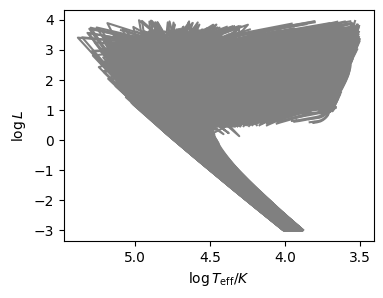

In [36]:
plt.figure(dpi=100, figsize=(4, 3))
ax = plt.gca()

change_indices_all = np.where((method_data["mass"].iloc[:-1].values != method_data["mass"].iloc[1:].values) | (method_data["he"].iloc[:-1].values != method_data["he"].iloc[1:].values))[0]
method_data_siginl = np.split(method_data, change_indices_all + 1)

for data in method_data_siginl:
    if not data.empty:
        ax.plot(data['log_Teff'], data['log_L'], color='gray')

ax.invert_xaxis()
# ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log L$')

In [200]:
from scipy.interpolate import interp1d
radius_values = np.arange(0.0, 0.50, 0.01)
chi2_radius = []
def interp1_data(x, y, x0, zero_indices):
        intersection_points = []
        for i in range(len(zero_indices)):
            x_sub = x.iloc[zero_indices[i]:zero_indices[i]+2]
            y_sub = y.iloc[zero_indices[i]:zero_indices[i]+2]
            interp_func = interp1d(y_sub, x_sub)
            intersection_point = interp_func(x0)
            intersection_points.append(intersection_point)
        return intersection_points
components = ["star_mass", "log_L", "radius", "star_age"]
component = components[2]
for x0 in radius_values:
    zero_indices = np.where((method_data[component].iloc[:-1].values-x0) * (method_data[component].iloc[1:].values-x0) <0)[0]
    interp_indices = np.setdiff1d(zero_indices, change_indices)
    if len(interp_indices) != 0:
        predicted_log_teff = interp1_data(method_data['log_Teff'],method_data[component], x0, interp_indices)
        predicted_log_g = interp1_data(method_data['log_g'], method_data[component], x0, interp_indices)
        predicted_log_he = method_data['log_he'].iloc[interp_indices].values
        chi2_log_Teff = chi2_sol(observed_log_Teff, predicted_log_teff, 0.015)
        chi2_log_g = chi2_sol(observed_log_g, predicted_log_g, 0.25)
        chi2_log_he = chi2_sol(observed_log_he, predicted_log_he, 0.1)
        chi2_interp = np.amin(chi2_log_Teff + chi2_log_g + chi2_log_he)
        chi2_radius.append(chi2_interp)
    else:
         chi2_radius.append(1000)



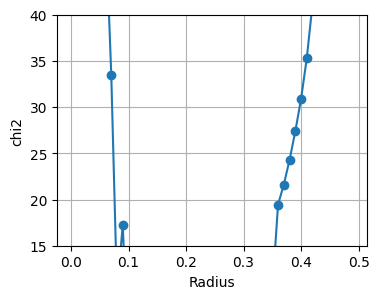

In [201]:
plt.figure(figsize=(4, 3))
plt.plot(radius_values, chi2_radius, marker='o')
plt.xlabel('Radius')
plt.ylabel('chi2')
plt.ylim(15, 40)
plt.grid(True)
plt.show()

In [202]:
print(min(chi2_radius))
min_index = np.argmin(chi2_radius)
print(radius_values[min_index])
G=6.67*10**11
M0 = 2*10**30
R0 = 6.955*10**8
g0 = 273.2
print(observed_log_g)
print('radius_true:',observed_data[i]['radius_true'])
print('mass_true', observed_data[i]['mass_true'])
m=10**observed_log_g*(0.162*6.963*10**8)**2/(2*10**30)/G
g = G*M0/R0**2
print(g)
print(m)

0.20944776208437874
0.22
5.593960418203078
radius_true: 0.225765486138942
mass_true 0.7298067751836618
2.757792339683939e+24
3.744789479774632e-21


In [26]:
from scipy.interpolate import interp1d
mass_values = np.arange(0.34, 0.95, 0.001)
chi2 = []
change_indices = np.where((method_data["mass"].iloc[:-1].values != method_data["mass"].iloc[1:].values) | (method_data["he"].iloc[:-1].values != method_data["he"].iloc[1:].values))[0]
def interp1_data(x, y, x0, zero_indices):
        intersection_points = []
        for i in range(len(zero_indices)):
            x_sub = x.iloc[zero_indices[i]:zero_indices[i]+2]
            y_sub = y.iloc[zero_indices[i]:zero_indices[i]+2]
            interp_func = interp1d(y_sub, x_sub)
            intersection_point = interp_func(x0)
            intersection_points.append(intersection_point)
        return intersection_points
components = ["log_Teff", "log_g"]
observed = [observed_log_Teff, observed_log_g, observed_log_he]
for mass_value in mass_values:
    chi2_c = 0
    for component in components:
        x0 = observed[components.index(component)]

        zero_indices = np.where((method_data[component].iloc[:-1].values-x0) * (method_data[component].iloc[1:].values-x0) <0)[0]
        interp_indices = np.setdiff1d(zero_indices, change_indices)
        if len(interp_indices) != 0:
            # mass = interp1_data(method_data['star_mass'],method_data[component], x0, interp_indices)
            chi2_mass = chi2_sol(mass_value, method_data['star_mass'].iloc[interp_indices], 0.001)
            chi2_he = chi2_sol(observed[2], method_data['log_he'].iloc[interp_indices],0.1)
            chi2_interp = np.amin(chi2_mass+chi2_he)
        else:
            chi2_interp = 1000
        chi2_c +=chi2_interp
    chi2.append(chi2_c)


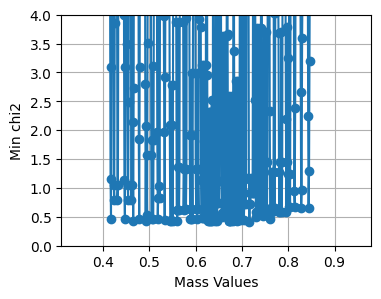

[311.63122509396084, 270.2593424214461, 232.8874597489314, 199.5155770764167, 170.143694403902, 141.53058912799943, 112.15870645548476, 86.78682378297006, 65.41494111045539, 48.0430584379407, 34.671175765426035, 25.299293092911377, 19.92741042039672, 11.58922411242013, 6.773733200963627, 5.958242289507131, 5.200659687140141, 4.425402035105598, 7.053519362590514, 11.47729049804568, 14.66179958658908, 11.143376759662983, 8.884277609264856, 5.01392797787144, 4.754828827473316, 8.4957296770752, 11.016920718820947, 16.201429807364573, 16.364951142390744, 10.624637201131671, 8.494891897306921, 4.754577956047853, 5.0142640147887905, 5.013876265052616, 4.754777114654048, 8.495677964255488, 15.362423562696918, 17.735638501671943, 14.991168748621215, 9.996697776970032, 7.494015351575514, 4.499544379924558, 5.014490291384541, 9.274176350125487, 17.53386240886644, 29.398140945874317, 29.88580654992986, 17.600146659159716, 9.314486768389585, 5.02882687761946, 4.743166986849341, 4.499661607865947, 5

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.plot(mass_values, chi2, marker='o')
plt.xlabel('Mass Values')
plt.ylabel('Min chi2')
plt.ylim(0, 4)
plt.grid(True)
plt.show()
print(chi2)

In [7]:
import pandas as pd
import numpy as np
import os
import random

method_data = pd.read_csv('/home/fmq/MESA/work/my/MCMC/code/lei/processed_data.csv')

def load_test():
    path_test_star = "/home/fmq/MESA/work/my/MCMC/code/lei//test_star"
    files = sorted(os.listdir(path_test_star))
    # 指定要使用的列
    usecols = ["star_mass", "surface_he4", "star_age", "log_Teff", "log_g", "log_L", "radius", "center_he4"]
    # 用于存储所有数据的列表
    data_list = []
    # 循环处理每个文件
    for i, file in enumerate(files):
        # 构建文件路径
        file_path = os.path.join(path_test_star, file)
        df = pd.read_csv(file_path, skiprows=5, delim_whitespace=True, usecols=usecols)
        df = df.apply(pd.to_numeric, errors='coerce')
        try:
            start_index = np.where(df['center_he4'] < 0.93)[0][0]
        except IndexError:
            # print(f"Error ZAHB: {files[i]}")
            continue
        df = df[start_index:-1]
        df.drop('center_he4', axis=1, inplace=True)
        df['star_age'] = np.log10(df['star_age'])
        df['surface_he4'] = np.log10(df['surface_he4']/4/(1-df['surface_he4']))
        # 在 start_index 和 df 的长度减一之间生成一个随机整数
        random_index = random.randint(0, len(df) - 1)
        data_list.append({
            'star_name': f'star{i}',
            'log_Teff': df["log_Teff"].iloc[random_index],
            'log_Teff_err': 0.013,
            'log_g': df["log_g"].iloc[random_index],
            'log_g_err': 0.1,
            'log_he': df["surface_he4"].iloc[random_index],
            'log_he_err': 0.1,
            'mass_true':df["star_mass"].iloc[random_index],
            'log_L_true':df["log_L"].iloc[random_index],
            'radius_true':df["radius"].iloc[random_index],
            'age_true':df["star_age"].iloc[random_index]
        })
    # 将所有的 DataFrame 连接成一个单一的 DataFrame
    return data_list
observed_data = load_test()
def chi2_sol(observed, predicted, observed_err):
        return ((observed - predicted) / observed_err) ** 2
# method_data = method_data.iloc[(abs(method_data['log_Teff']-4.55)<0.05).tolist()]
# method_data = method_data.iloc[(abs(method_data['log_g']-6.00)<0.1).tolist()]
# method_data = method_data.iloc[(abs(method_data['log_he']-0.907)<0.5).tolist()]
i = 0
observed_log_Teff = observed_data[i]['log_Teff']
observed_log_g = observed_data[i]['log_g']
observed_log_he = observed_data[i]['log_he']
mass_true = observed_data[i]['mass_true']
print(mass_true)


0.34694297066812874


In [26]:
method_0 = method_data[(observed_log_Teff-0.01 < method_data['log_Teff']) & (method_data['log_Teff'] < observed_log_Teff+0.01)]
method_0 = method_0[(observed_log_g-0.1 < method_0['log_g']) & (method_0['log_g'] < observed_log_g+0.1)]
method_0 = method_0[(observed_log_he-0.1 < method_0['log_he']) & (method_0['log_he'] < observed_log_he+0.1)]
print(observed_log_Teff)
print(observed_log_g)
print(observed_log_he)

4.291506980505478
4.713679652122768
-0.6021144086381037


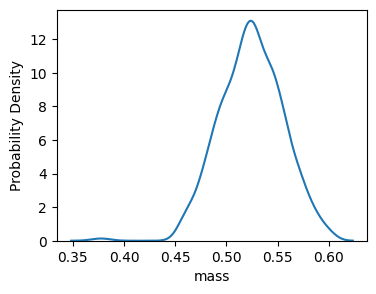

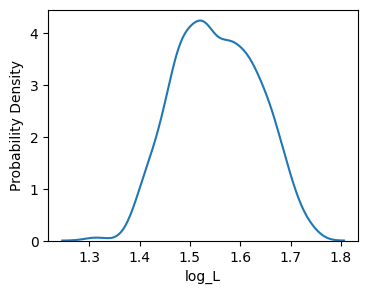

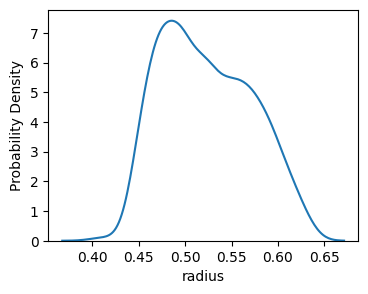

In [33]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
def plot_density_and_cumulative_density(data, column):
    # 计算累计频率
    sorted_data = data.sort_values(column)
    c = np.array(sorted_data[column])
    # cumfreqs, lowlim, binsize, extrapoints = stats.cumfreq(c, numbins=len(data))

    # # 计算累计密度
    # cum_density = cumfreqs / len(c)

    # # 画出累计密度函数
    # x = np.linspace(lowlim, lowlim + binsize*len(data), len(data))
    # plt.figure(figsize=(10, 5))
    # plt.subplot(1, 2, 1)
    # plt.plot(x, cum_density)
    # plt.xlabel(column)
    # plt.ylabel('Cumulative Density')
    plt.figure(figsize=(4, 3))
    # 画出概率密度曲线
    # plt.subplot(1, 2, 2)
    sns.kdeplot(c, bw_adjust=1)
    plt.xlabel(column)
    plt.ylabel('Probability Density')
    plt.show()

# 对'mass'，'log_L'和'radius'分别调用函数
plot_density_and_cumulative_density(method_0, 'mass')
plot_density_and_cumulative_density(method_0, 'log_L')
plot_density_and_cumulative_density(method_0, 'radius')

[4.60753059e-126]


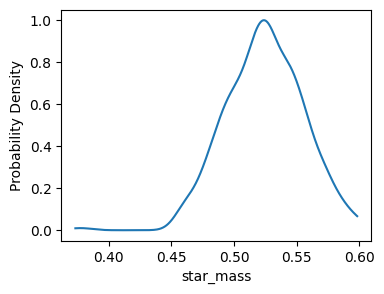

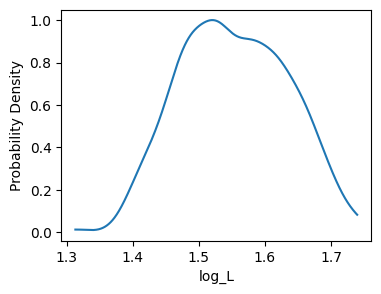

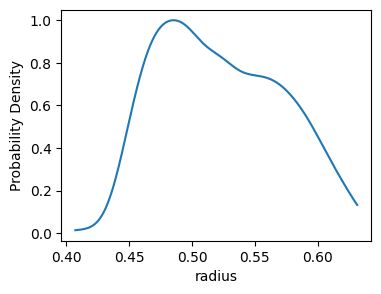

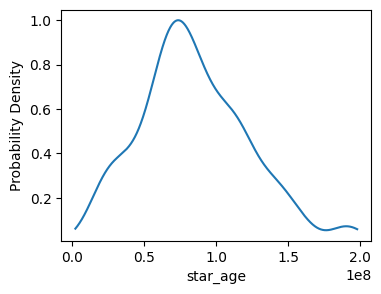

In [28]:

class Density:
    def __init__(self, data, column):
        plt.figure(figsize=(4, 3))
        sorted_data = data.sort_values(column)
        c = np.array(sorted_data[column])

        self.density = stats.gaussian_kde(c)
        self.x_vals = np.linspace(min(c), max(c), 1000)
        self.y_vals = self.density(self.x_vals)/max(self.density(self.x_vals))

        plt.plot(self.x_vals, self.y_vals)
        plt.xlabel(column)
        plt.ylabel('Probability Density')

    def normalized_density(self, x):
        y = self.density(x)
        return y / max(self.density(self.x_vals))

# 对'mass'，'log_L'和'radius'分别调用函数
densities = {
            'star_mass': Density(method_0, 'star_mass').normalized_density,
            'log_L': Density(method_0, 'log_L').normalized_density,
            'radius': Density(method_0, 'radius').normalized_density,
            'star_age': Density(method_0, 'star_age').normalized_density
        }

# 给出任意的mass，对概率密度曲线进行插值
mass = 0.8
print(densities["star_mass"](mass))

In [5]:
import numpy as np

def calculate_chi_squared(observed_values, expected_values):
    # 计算每个区间的卡方值
    chi_squared_values = (observed_values - expected_values)**2 / expected_values
    
    # 总和卡方值
    total_chi_squared = np.sum(chi_squared_values)
    
    return total_chi_squared

# 示例数据
observed_values = np.array([10, 15, 8, 12, 5])
prob_density_function = density

# 定义区间数
num_bins = len(observed_values)

# 计算期望值
expected_values = np.array([prob_density_function(x) * np.sum(observed_values) for x in range(num_bins)])

# 计算卡方值
chi_squared = calculate_chi_squared(observed_values, expected_values)

print(f"卡方值: {chi_squared}")


卡方值: 5.8


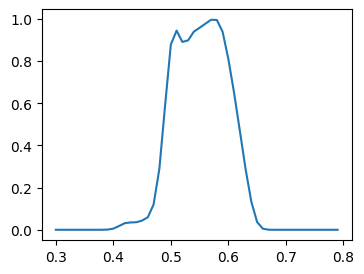

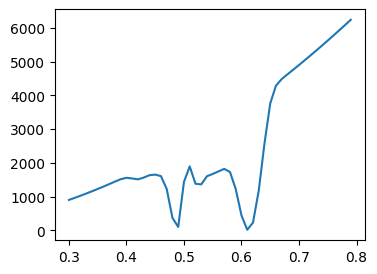

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def density(data, column):
    sorted_data = data.sort_values(column)
    c = np.array(sorted_data[column])

    density = stats.gaussian_kde(c)
    x_vals = np.linspace(min(c), max(c), 1000)

    def normalized_density(x):
        y = density(x)
        return y / max(density(x_vals))

    return normalized_density

def calculate_chi_squared_for_data(data, density_function, column):
    observed_values = data[column]
    expected_values = density_function(observed_values)
    
    # 计算每个数据点的卡方值
    x = np.arange(0.3, 0.8, 0.01)
    chi_squared_values = (observed_values - expected_values)**2 / 0.01**2
    plt.figure(figsize=(4, 3))
    plt.plot(observed_values, expected_values)
    plt.figure(figsize=(4, 3))
    plt.plot(observed_values, chi_squared_values)
    return chi_squared_values

# 示例数据
np.random.seed(42)
mass = pd.DataFrame({'star_mass': np.arange(0.3, 0.8, 0.01)})
# 计算概率密度函数
density_func = density(method_0, 'star_mass')

# 计算每个数据点的卡方值
chi_squared_values = calculate_chi_squared_for_data(mass, density_func, 'star_mass')

# 打印结果
# print(chi_squared_values)


In [5]:
import emcee
import time
from multiprocessing import Pool
import getdist
import corner
def log_probability(p0, densities):
    return log_likelihood(p0, densities)
def log_likelihood(p0, densities):
    components = ["star_mass", "log_L", "radius", "star_age"]
    chi2 = 0
    for component in components:
        density = densities[component](p0[components.index(component)])
        if density <= 0:
            return -np.inf
        chi2 += np.log(density)
    return chi2
def MCMC(observed_data, densities):
    # 初始化步行者的起始位置
    initial_guess = [0.47, 1.5, 0.25, 8.4]
    step = [0.1, 1.0, 0.20, 0.5]
    # step = [1e-2,1e-1,1e-2,0.1]
    p0 = initial_guess + step * np.random.rand(nwalkers, ndim)
    # 创建MCMC采样器并运行
    pool_if = 1
    if pool_if == 0:
        sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=[densities])
        sampler.run_mcmc(p0, nsteps, progress=True)
    else:
        with Pool() as pool:
            sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=[densities], pool=pool)
            start = time.time()
            sampler.run_mcmc(p0, nsteps, progress=True)
            end = time.time()
            multi_time = end - start
            print("Multiprocessing took {0:.1f} seconds".format(multi_time))
    samples_chain = sampler.get_chain()
    samples = samples_chain[:, :, :].reshape((-1, ndim))[int(50*nwalkers):]
    # samples = np.load(f'./samples/samples_{nwalkers}_{nsteps}.npy')
    # 使用getdist创建MCSamples对象
    names = ['Star Mass', 'log_L', 'radius', 'age']
    labels = ['M', 'log_L', 'radius', 'age']
    fig = corner.corner(samples, labels=labels,  sharex=True, sharey=True,show_titles=True) 
    #truths=[observed_data['mass_true'], observed_data['log_L_true'], observed_data['radius_true'],observed_data['age_true']])
    axes = np.array(fig.axes).reshape((ndim, ndim))

nwalkers = 128
ndim = 4
nsteps = 100
MCMC(method_0,densities)

KeyboardInterrupt: 

In [7]:
import numpy as np
p0 = 1 + 2 * np.random.rand(100, 1)


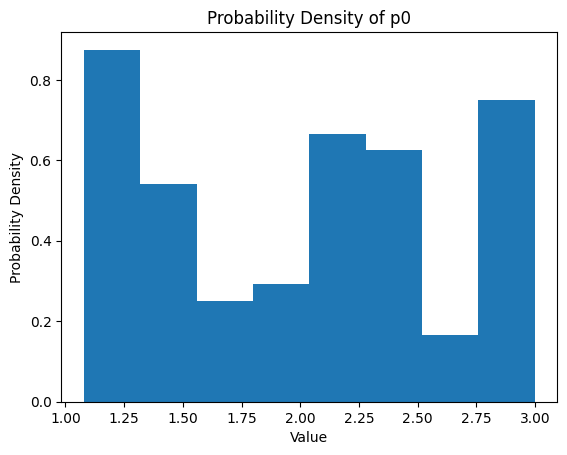

In [8]:
import matplotlib.pyplot as plt


plt.hist(p0, bins='auto', density=True)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density of p0')
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 1173.74it/s]


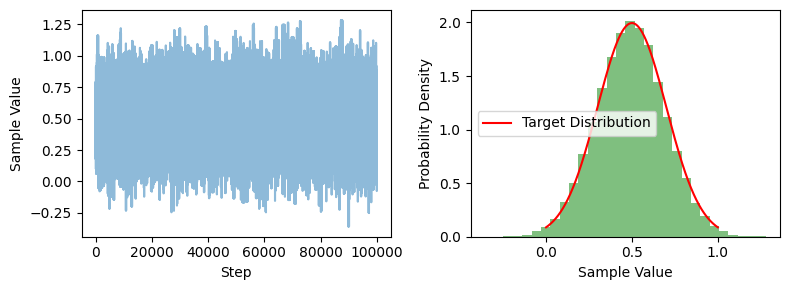

In [14]:
import emcee
import numpy as np
import matplotlib.pyplot as plt

# 定义目标概率密度函数
def target_distribution(x, mean=0.5, std=0.2):
    return np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))

# 定义对数概率密度函数
def log_prob(x):
    return np.log(target_distribution(x))

# 设置 emcee 的参数
nwalkers = 100
ndim = 1
nsteps = 1000

# 初始化 walkers 的起始位置
initial_positions = np.random.randn(nwalkers, ndim) * 0.1 + 0.5

# 创建一个 EnsembleSampler 对象
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)

# 运行 MCMC 链
sampler.run_mcmc(initial_positions, nsteps, progress=True)

# 获取样本
samples = sampler.get_chain(flat=True)

# 画出角图
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(samples, alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Sample Value')

plt.subplot(1, 2, 2)
plt.hist(samples, bins=30, density=True, alpha=0.5, color='g')
x_vals = np.linspace(0, 1, 1000)
plt.plot(x_vals, target_distribution(x_vals), 'r-', label='Target Distribution')
plt.xlabel('Sample Value')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


100%|██████████| 1000/1000 [00:01<00:00, 979.19it/s]


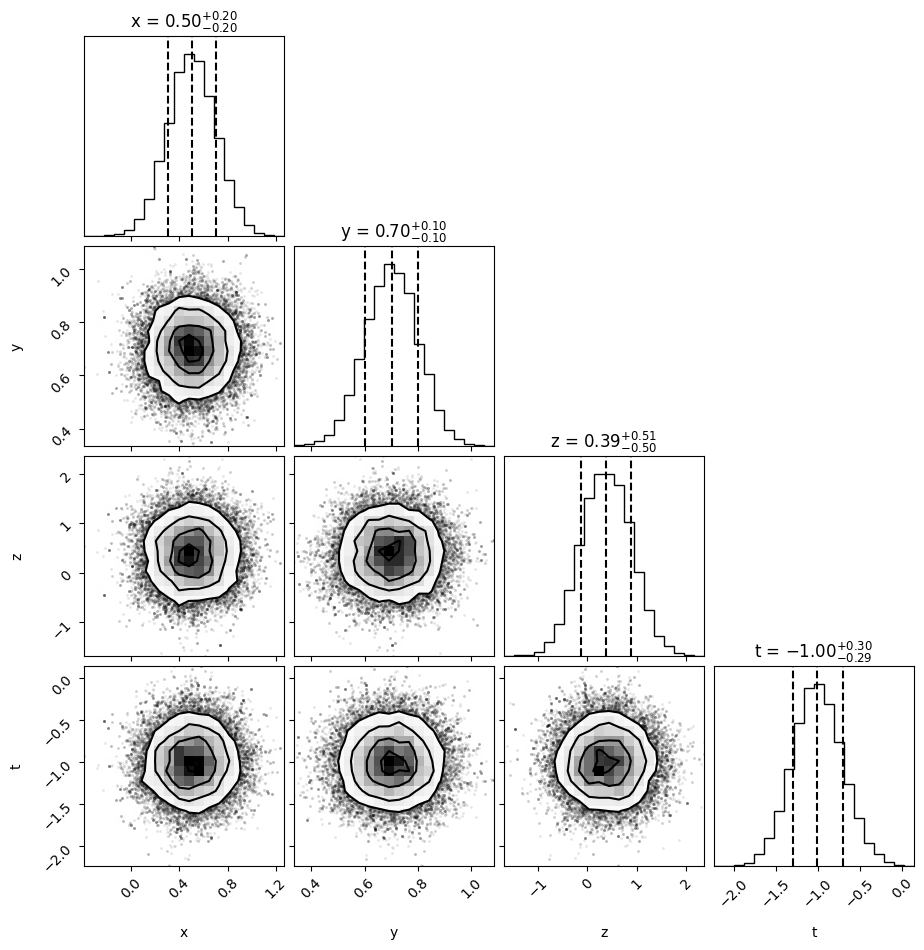

In [44]:
import emcee
import numpy as np
import matplotlib.pyplot as plt
import corner


# Define the target distribution
def target_distributionx(x, mean=0.5, std=0.2):
    return np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))
def target_distributiony(x, mean=0.7, std=0.1):
    return np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))
def target_distributionz(x, mean=0.4, std=0.5):
    return np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))
def target_distributiont(x, mean=-1.0, std=0.3):
    return np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))
# Define the log probability function
def log_prob(p):
    x,y,z,t =p
    return np.log(target_distributionx(x))+np.log(target_distributiony(y))+np.log(target_distributionz(z))+np.log(target_distributiont(t))


# Set emcee parameters
nwalkers = 100
ndim = 4
nsteps = 1000

# Initialize walker positions
initial_positions = np.random.rand(nwalkers, ndim) * 0.1 + 0.5

# Create an EnsembleSampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)

# Run MCMC chain
sampler.run_mcmc(initial_positions, nsteps, progress=True)

# Get samples
samples = sampler.get_chain(flat=True)[int(nsteps/2*nwalkers):]

# Plot corner plot
labels = ['x','y','z','t']
fig = corner.corner(samples, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})
plt.show()


In [ ]:
method_data = pd.read_csv('/home/fmq/MESA/work/my/MCMC/code/lei/processed_data.csv')
observed_log_Teff = 4.425534220498263
observed_log_g = 5.53000020980835
observed_log_he = -2.612
method_0 = method_data[
            (observed_log_Teff - 0.01 < method_data['log_Teff']) & 
            (method_data['log_Teff'] < observed_log_Teff + 0.01) &
            (observed_log_g-0.1 < method_data['log_g']) & 
            (method_data['log_g'] < observed_log_g + 0.1) &
            (observed_log_he - 0.1 < method_data['log_he']) & 
            (method_data['log_he'] < observed_log_he + 0.1)
        ]
def density(data, column, min_c, max_c):
    sorted_data = data.sort_values(column)
    c = np.array(sorted_data[column])

    x_vals = np.linspace(min_c, max_c, 1000)
    density = stats.gaussian_kde(c)
    y_vals = density(x_vals)/max(density(x_vals))
    return x_vals, y_vals

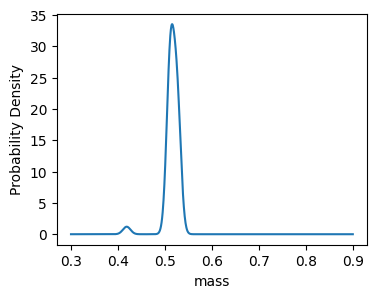

In [43]:
def density(data, column):
    sorted_data = data.sort_values(column)
    c = np.array(sorted_data[column])
    density = stats.gaussian_kde(c)
    return density
density_x = density(method_0,'star_mass')
density_y = density(method_0,'log_L')
density_z = density(method_0,'radius')
density_t = density(method_0,'star_age')
x_vals = np.linspace(0.3, 0.9, 1000)
y_vals = density_x(x_vals)
plt.figure(figsize=(4, 3))
plt.plot(x_vals, y_vals)
plt.xlabel('mass')
plt.ylabel('Probability Density')
plt.show()

/tmp/ipykernel_633/2739652650.py:36: RuntimeWarning: divide by zero encountered in log
  return np.log(density_x(x))+np.log(density_y(y))+np.log(density_z(z))+np.log(density_t(t))
  0%|          | 0/400 [00:00<?, ?it/s]

/tmp/ipykernel_633/2739652650.py:36: RuntimeWarning: divide by zero encountered in log
  return np.log(density_x(x))+np.log(density_y(y))+np.log(density_z(z))+np.log(density_t(t))
/home/fmq/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/tmp/ipykernel_633/2739652650.py:36: RuntimeWarning: divide by zero encountered in log
  return np.log(density_x(x))+np.log(density_y(y))+np.log(density_z(z))+np.log(density_t(t))
/home/fmq/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/tmp/ipykernel_633/2739652650.py:36: RuntimeWarning: divide by zero encountered in log
  return np.log(density_x(x))+np.log(density_y(y))+np.log(density_z(z))+np.log(density_t(t))
/home/fmq/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encoun

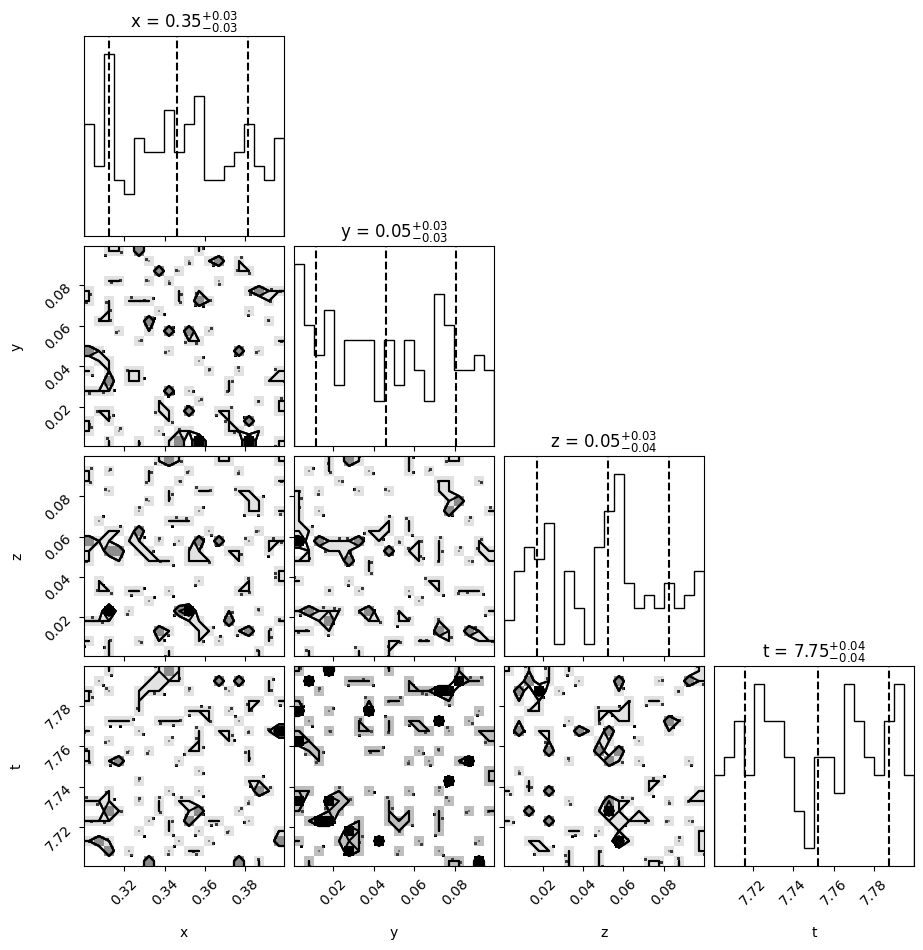

In [93]:
import emcee
import numpy as np
import matplotlib.pyplot as plt
import corner
from scipy.interpolate import interp1d

# Define the target distribution

def density(data, column):
    sorted_data = data.sort_values(column)
    c = np.array(sorted_data[column])
    density = stats.gaussian_kde(c)
    return density
density_x = density(method_0,'star_mass')
density_y = density(method_0,'log_L')
density_z = density(method_0,'radius')
density_t = density(method_0,'star_age')
# def density_x(x, mean=0.5173828863115068, std=0.011513851081135548):
#     return np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))
# def density_y(x, mean=1.3470732735500035, std=0.04244282296219904):
#     return np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))
# def density_z(x, mean=0.21953298894478968, std=0.007842173785520669):
#     return np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))
# def density_t(x, mean=8.277145246655548, std=0.040871604178521266):
#     return np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))
# x_vals = np.linspace(0.3, 0.9, 1000)
# y_vals = density_x(x_vals)
# plt.figure(figsize=(4, 3))
# plt.plot(x_vals, y_vals)
# plt.xlabel('mass')
# plt.ylabel('Probability Density')
# plt.show()
# Define the log probability function
def log_prob(p):
    x,y,z,t = p
    return np.log(density_x(x))+np.log(density_y(y))+np.log(density_z(z))+np.log(density_t(t))

# Set emcee parameters
nwalkers = 128
ndim = 4
nsteps = 400

# Initialize walker positions
initial_positions = np.random.rand(nwalkers, ndim) * 0.1 + [0.4, 0.5, 0.1, 7.9]

# Create an EnsembleSampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)

# Run MCMC chain
sampler.run_mcmc(initial_positions, nsteps, progress=True)

# Get samples
samples = sampler.get_chain(flat=True)[int(nsteps/2*nwalkers):]

# Plot corner plot
labels = ['x','y','z','t']
fig = corner.corner(samples, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})
plt.show()


Mean: 0.5173828863115068
Standard Deviation (sigma): 0.011513851081135548


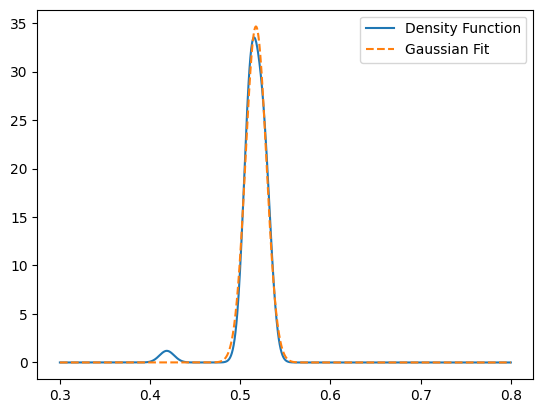

In [89]:
from scipy.stats import gaussian_kde
import numpy as np

def density(data, column):
    sorted_data = data.sort_values(column)
    c = np.array(sorted_data[column])
    density = stats.gaussian_kde(c)
    return density


# 创建密度函数
density_x = density(method_0,'star_mass')

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit


def gaussian(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# 创建密度函数

# 获取数据范围
x_vals = np.linspace(0.3, 0.8, 1000)

# 获取高斯拟合的初始参数
initial_params = [np.mean(method_0['star_mass']), np.std(method_0['star_mass'])]

# 使用 curve_fit 进行拟合
params, covariance = curve_fit(gaussian, x_vals, density_x(x_vals), p0=initial_params)

# 输出结果
mean_fit, std_fit = params

print(f"Mean: {mean_fit}")
print(f"Standard Deviation (sigma): {std_fit}")

# 绘制结果
plt.plot(x_vals, density_x(x_vals), label='Density Function')
plt.plot(x_vals, gaussian(x_vals, mean_fit, std_fit), label='Gaussian Fit', linestyle='--')
plt.legend()
plt.show()


# 创建密度函数


# # 生成 x 值
# x_vals = np.linspace(0.3, 0.8, 1000)

# # 获取拟合后的表达式
# y_vals = get_density_expression(density_x, x_vals)

# # 输出表达式
# print(f"Density Expression: {y_vals}")
# plt.figure(figsize=(4, 3))
# plt.plot(x_vals, y_vals)
# plt.xlabel('mass')
# plt.ylabel('Probability Density')
# plt.show()

In [5]:
import pandas as pd
import numpy as np
import os
import random

method_data = pd.read_csv('/home/fmq/MESA/work/my/MCMC/code/all_sd_data.csv')



def chi2_sol(observed, predicted, observed_err):
        return ((observed - predicted) / observed_err) ** 2

observed_log_Teff =  4.261617914445189
observed_log_g = 5.215626503215392
observed_log_he = -0.957451060331671
# mass_true = observed_data[i]['mass_true']
# print(mass_true)


In [2]:

change_indices = np.where(method_data["core_mass"].iloc[:-1].values != method_data["core_mass"].iloc[1:].values)[0]
predicted_log_teff = method_data['log_Teff'].values
predicted_log_g = method_data['log_g'].values
predicted_log_he = method_data['log_he'].values
chi2_log_Teff = chi2_sol(observed_log_Teff, predicted_log_teff, 0.013)
chi2_log_g = chi2_sol(observed_log_g, predicted_log_g, 0.25)
chi2_log_he = chi2_sol(observed_log_he, predicted_log_he, 0.1)
chi2_interp = chi2_log_Teff + chi2_log_g + chi2_log_he
chi2_interp_segments = np.split(chi2_interp, change_indices + 1)
method_data_segments = np.split(method_data, change_indices + 1)
min_values = []
for segment in chi2_interp_segments:
        a = min(segment)
        min_values.append(a)
# min_values = [min(segment) for segment in chi2_interp_segments]
mass_values = [segment['core_mass'].iloc[0] for segment in method_data_segments]
# 计算这些最小值的平均值


/home/fmq/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


/tmp/ipykernel_21436/1217030792.py:2: RuntimeWarning: divide by zero encountered in log10
  min_log_values = np.log10(min_values)


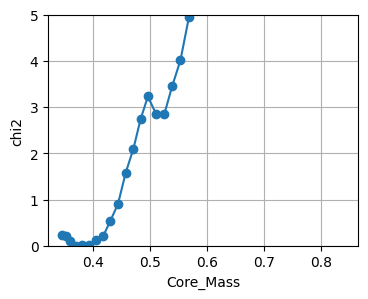

In [3]:
import matplotlib.pyplot as plt
min_log_values = np.log10(min_values)
# log_p = np.exp(-0.5*vaule for vaule in min_values)
plt.figure(figsize=(4, 3))
plt.plot(mass_values, min_values, marker='o')
plt.xlabel('Core_Mass')
plt.ylabel('chi2')
plt.ylim(0, 5)
plt.grid(True)
plt.show()

/tmp/ipykernel_21436/2516454664.py:2: RuntimeWarning: divide by zero encountered in log10
  min_log_values = np.log10(min_values)


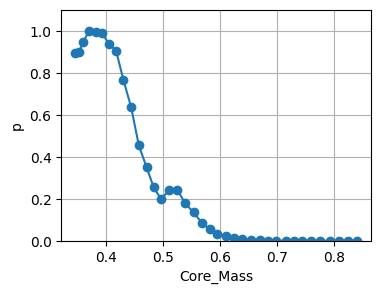

In [4]:
import matplotlib.pyplot as plt
min_log_values = np.log10(min_values)
log_p = np.exp(-0.5*np.array([value for value in min_values]))
plt.figure(figsize=(4, 3))
plt.plot(mass_values, log_p, marker='o')
plt.xlabel('Core_Mass')
plt.ylabel('p')
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

/tmp/ipykernel_21436/2555429805.py:21: RuntimeWarning: divide by zero encountered in log10
  min_log_values = np.log10(min_values)


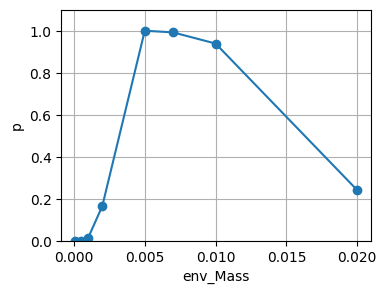

In [7]:
method_data = method_data.sort_values('env_mass')

change_indices = np.where(method_data["env_mass"].iloc[:-1].values != method_data["env_mass"].iloc[1:].values)[0]
predicted_log_teff = method_data['log_Teff'].values
predicted_log_g = method_data['log_g'].values
predicted_log_he = method_data['log_he'].values
chi2_log_Teff = chi2_sol(observed_log_Teff, predicted_log_teff, 0.013)
chi2_log_g = chi2_sol(observed_log_g, predicted_log_g, 0.25)
chi2_log_he = chi2_sol(observed_log_he, predicted_log_he, 0.1)
chi2_interp = chi2_log_Teff + chi2_log_g + chi2_log_he
chi2_interp_segments = np.split(chi2_interp, change_indices + 1)
method_data_segments = np.split(method_data, change_indices + 1)
min_values = []
for segment in chi2_interp_segments:
        a = min(segment)
        min_values.append(a)
# min_values = [min(segment) for segment in chi2_interp_segments]
mass_values = [segment['env_mass'].iloc[0] for segment in method_data_segments]
# 计算这些最小值的平均值
import matplotlib.pyplot as plt
min_log_values = np.log10(min_values)
log_p = np.exp(-0.5*np.array([value for value in min_values]))
plt.figure(figsize=(4, 3))
plt.plot(mass_values, log_p, marker='o')
plt.xlabel('env_Mass')
plt.ylabel('p')
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()